# Mission 1

Display the first 10 rows of the following file: http://bit.ly/imdbratings

In [0]:
import pandas as pd

df = pd.read_csv('http://bit.ly/imdbratings')

In [0]:
df.head(10)

star_rating  ...                                        actors_list
0          9.3  ...  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1          9.2  ...    [u'Marlon Brando', u'Al Pacino', u'James Caan']
2          9.1  ...  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3          9.0  ...  [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4          8.9  ...  [u'John Travolta', u'Uma Thurman', u'Samuel L....
5          8.9  ...  [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...
6          8.9  ...  [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
7          8.9  ...  [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...
8          8.9  ...  [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...
9          8.9  ...  [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...

[10 rows x 6 columns]

# Mission 2

Sort your dataframe in ascending order according to the star_rating column.

In [0]:
df.sort_values(['star_rating'])

star_rating  ...                                        actors_list
978          7.4  ...  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
950          7.4  ...  [u'Jennifer Tilly', u'Gina Gershon', u'Joe Pan...
949          7.4  ...  [u'Macaulay Culkin', u'Joe Pesci', u'Daniel St...
948          7.4  ...  [u'Greta Gerwig', u'Mickey Sumner', u'Adam Dri...
947          7.4  ...  [u'Jack Nance', u'Charlotte Stewart', u'Allen ...
..           ...  ...                                                ...
6            8.9  ...  [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...
3            9.0  ...  [u'Christian Bale', u'Heath Ledger', u'Aaron E...
2            9.1  ...  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
1            9.2  ...    [u'Marlon Brando', u'Al Pacino', u'James Caan']
0            9.3  ...  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...

[979 rows x 6 columns]

# Mission 3

Answer the question below:
- What is the median star rating?
- What gender is the most highly rated?
- What is the percentage for each film genre?

In [0]:
df.describe()

star_rating    duration
count   979.000000  979.000000
mean      7.889785  120.979571
std       0.336069   26.218010
min       7.400000   64.000000
25%       7.600000  102.000000
50%       7.800000  117.000000
75%       8.100000  134.000000
max       9.300000  242.000000

In [0]:
# median star_rating?
df.star_rating.mean()

7.8897854954034985

In [0]:
# gender is the most highly rated?
df[['star_rating', 'genre']].groupby(['genre']).mean().sort_values(['star_rating'], ascending = False).head(1)

star_rating
genre               
Western     8.255556

In [0]:
# percentage for each film genre?
round(df['genre'].value_counts()/df.shape[0]*100, 2)

Drama        28.40
Comedy       15.93
Action       13.89
Crime        12.67
Biography     7.87
Adventure     7.66
Animation     6.33
Horror        2.96
Mystery       1.63
Western       0.92
Thriller      0.51
Sci-Fi        0.51
Film-Noir     0.31
Family        0.20
Fantasy       0.10
History       0.10
Name: genre, dtype: float64

# Mission 4

Make a visualization using matplotlib that reflects the film genres. Make it a pie chart, it should have a legend and show the percentages of each genre.

In [0]:
import matplotlib.pyplot as plt

In [0]:
dataPie = pd.DataFrame(round(df['genre'].value_counts()/df.shape[0]*100, 2))

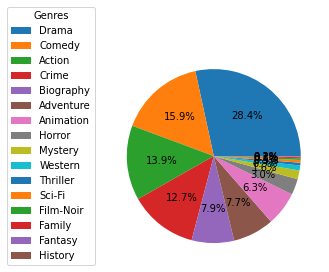

In [0]:
_ = plt.pie(dataPie['genre'], autopct='%1.1f%%')
_ = plt.legend(title = 'Genres', labels = dataPie.index, loc = (-0.45,0))

plt.show()

# Mission 5

Display only the rows of films that belong to the lowest rated genre on average

In [0]:
genres_notes = df[['star_rating', 'genre']].groupby(['genre']).mean().sort_values(['star_rating'])

In [0]:
df[df['genre'] == genres_notes.index[0]]

star_rating  ...                                        actors_list
350          8.0  ...  [u'Teresa Wright', u'Joseph Cotten', u'Macdona...
496          7.8  ...  [u'James Caan', u'Kathy Bates', u'Richard Farn...
728          7.6  ...  [u'Antonio Banderas', u'Elena Anaya', u'Jan Co...
848          7.5  ...  [u'James Stewart', u'Doris Day', u'Brenda de B...
902          7.5  ...   [u'Jon Finch', u'Barry Foster', u'Alec McCowen']

[5 rows x 6 columns]

# Mission 6

Display films that are longer than 200 minutes and that belong to a genre that's name contains the letter h (either lower case or upper case)


In [0]:
df[['title', 'genre']][(df['duration'] >= 200) & (df.genre.str.lower().str.contains('h'))]

title      genre
630  Malcolm X  Biography